# PyTorch Foundations

Tutorial by Abdulah Fawaz and Emma Robinson

## 1. PyTorch Tensors

PyTorch is a lot like numpy. A lot of operations used to manipulate numpy arrays have their counterparts in PyTorch, and numpy arrays can be converted to and from PyTorch *tensors*. PyTorch arrays are given the more proper mathematical name of tensors (see e.g tensorflow). In terms of practical usage PyTorch tensors can be manipulated very similarly to NumPy’s *ndarrays*, with the addition being that Tensors can also be used on a GPU to accelerate computing.

Below are some examples. Let us begin by importing torch and numpy.

In [ ]:
import torch 
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Generating a random array of size 2x2x2: NumPy vs PyTorch

In [ ]:
# Numpy
numpy_random_arr = np.random.rand(2, 2, 2)
numpy_random_arr

In [ ]:
# PyTorch
torch_random_arr = torch.rand(2, 2, 2)
torch_random_arr

They are indexed in the same way

In [ ]:
torch_random_arr[0,0,0], numpy_random_arr[0, 0, 0]

and can be reshaped using reshape functions ...

In [ ]:
torch_random_arr = torch_random_arr.reshape(4, 2)
print(torch_random_arr.size())

In [ ]:
numpy_random_arr = np.reshape(numpy_random_arr, [4, 2])
print(numpy_random_arr.shape)

Converting to and from numpy arrays is easy:

In [ ]:
a = np.array([[1, 2], [3, 4]]) # make a numpy array

a_torch = torch.from_numpy(a) #converting to a torch Tensor from a numpy array
print(a_torch) 

a_np = a_torch.numpy() # converting to a numpy array from a torch Tensor
print(a_np)

Other basic functions such as torch.diag, torch.cat (concatenate), torch.matmul work similarly to their numpy equivalents. <br>
As always, when looking for a function **check the [documentation](https://stackoverflow.com/questions/25692293/inserting-a-link-to-a-webpage-in-an-ipython-notebook)** and consider running through the [official pytorch tutorial](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html) on tensor manipulation 

Note like in numpy, the data type (dtype) of an object is important.
PyTorch Tensors types - just like in any other programming language - depend on whether they are storing integers, floating points or bools, and in how many bits. Often, it is important to make sure tensors are of the right / matching type when performing operations on them.
<br>
See https://pytorch.org/docs/stable/tensors.html for a list of dtypes and what they are called in PyTorch.

Changing torch tensor type is simple:


In [ ]:
print(a_torch)
print(a_torch.to(torch.double)) #casts the int32 dtype tensor into a 64 bit float dtype tensor

Finally, tensor reshaping/resizing can be completed using torch.view:

In [ ]:
x = torch.randn(3, 3)
y = x.view(1, -1)  # the size -1 is inferred from other dimensions
#
print(x.size(), y.size())

### STUDENTS TASK - EXERCISE 1 ###


### Basic Tensor Operations ###

There is some streamlining of operations in pytorch relative to numpy which can simplify code development. For example, compare here the multiplications of two arrrays using broadcasting.

1. Generate two random numpy arrays, **a** and __b__ of sizes [12, 5] and [3, 5, 20] 


2. Find the matrix product **a** $\cdot$ __b__ using broadcasting.
    **hint: may need to reshape a first:**  multiplication of 3D arrays involves [multiplication of stacks of 2D matrices]( https://www.geeksforgeeks.org/numpy-3d-matrix-multiplication/). Therefore, the final result should be of shape (3, 12, 20), since multiplication of a ($12 \times 5$) and a ($5 \times 20$) matrix returns shape ($12 \times 20$) 
    
    
3. Convert **a** and __b__ into PyTorch Tensors and perform direct multiplication (without reshaping).



In [ ]:
# STUDENTS CODE HERE
# 1.1. create numpy arrays a and b
a = None
b = None

# 1.2 find the matrix product of a and b through broadcasting, you will need to reshape a first
numpy_mult = None

# 1.3 do the same thing but for pytorch tensors - no reshaping will be required
a_t = None
b_t = None
pytorch_mult = None

print(pytorch_mult.shape)

## 2. Autograd: automatic differentiation

As you might imagine, it is not the similarities between the two that we are interested in, but what makes torch Tensors relevant to machine learning. The most significant and relevant difference is that PyTorch Tensors also have an associated *gradient*. It is this that is used to perform the optimization that machine learning is based on. 

The gradient of a pytorch tensor is stored as its ```.grad``` attribute. All pytorch tensors have this even if it is not apparent nor used. In such a case it would be set to "None". 

All PyTorch tensors have another boolean attribute ```requires_grad``` that indicates whether pytorch *needs* to track and store its gradient or whether it is simply a static tensor. By default, requires_grad is set to False.
When we later construct neural networks from the torch.nn neural network module, requires_grad will be automatically set to True for the relevant learning parameters so it is not something you should generally worry about setting manually.

In addition the attribute ```grad_fn```: This is the backward function used to calculate the gradient.

### STUDENTS TASK - EXERCISE 2 ###

### Run backpropagation using autograd for a simple function ###

For example, let's observe gradient estimation for a simple function $L = \frac{1}{N} \sum_{i}\sum_j (2x_{ij}+3)^2  $ operating on a matrix $\mathbf{X}$ with $N$ elements.

**To do** run this code and check the outputs. Consider also printing out the `is_leaf` and requires_grad attributes for each tensor

In [ ]:
X = torch.ones(5,5, requires_grad=True) # generate a random Tensor

print('Initial gradient:', X.grad) # check its gradient - the result is None

y   = 2 * X + 3
z   = y * y
out = z.mean()

out.backward()

print('grad:', X.grad) 
print('grad_fn:', out.grad_fn)


**See if you can prove this is correct using the chain rule.**

Then you could try repeating the process for another simple function of your choice. Try also generating $\mathbf{X}$ in different ways, using torch random number generators, for example.


In practice the ```autograd``` package provides an engine to perform backpropagation. As variables and operations are defined it sets up a dynamic computational graph in the same sense as we saw in our first lecture. In this, the leaves of the graph are input tensors, defined using initialisation operations such as those shown [above](#tensors), and identified using the attribute ```is_leaf==True```. Roots are output tensors. Gradients are then calculated by tracing the graph from the root to the leaf and multiplying every gradient in the way using the chain rule. 



## 3. PyTorch NN Functions

In [ ]:
import torch.nn as nn

The torch.nn module contains all the functions you will need to build a neural network. For example, here is the definition of a Linear Layer (the $Z=WX$ component of a fully connected network, using the terminology from our first lecture)

<img src="https://drive.google.com/uc?id=1sSOfwz1iVdXGA-rmeJnOl--4DrMKij6e" alt="Drawing" style="width: 800px;"/>


This shows that we must pass it the total number of input (columns of $\mathbf{W}$ using notation of first lecture) and output features (the rows of $\mathbf{W}$ using notation of first lecture). It also has `bias=True` by default. 

Here we will create a linear layer with  3x100x100 = 300000 input features and 10 output features and will apply it to a flattened input image of original shape (3,100,100)

**Note** PyTorch only supports gradient estimation for floating point tensors.

In [ ]:
import torch.nn as nn # importing torch.nn 

# the first dimension has size N where N is the number of images. 
# here it is simply 1

input_image = torch.randint(0, 255, (1, 3, 100, 100)) # our random image. 
input_image = input_image.to(torch.float)             # tensors must be cast as float 

fc_operation = nn.Linear(30000, 10)                   # defining our fully connected Linear layer

reshaped_input_image = input_image.reshape(input_image.size(0), -1) #reshaping input image 

print('input image shape ', input_image.shape,'reshaped_input_image shape', reshaped_input_image.shape)
result = fc_operation(reshaped_input_image) 


Note, goal with the reshape operation is to unravel the image into a single vector. As you may be accustomed with in numpy, reshape dimensions of (input_image.size(0), -1) reshape the image into a vector, where -1 tells PyTorch to, essentially, figure out itself what should be the corresponding size of this dimension given the input. 

Further, input_image.size(0) returns the size of the first dimension of our image array, which represents the number of examples. Here it is one, but in real examples, there can be a variable number of images used in each batch. By defining the first dimension of the reshape size(0) it ensures that we unravel each image independently, to return an $N \times 300000$ array: ```reshaped_input_image```

## 4. nn.Functional

As you will see as we go forward most PyTorch layers can be implemented either as a `torch.nn.Module` object or as a `torch.nn.Functional` function. So which should you use? 

Essentially,  `nn.functional` provides building block functions (e.g. layers / activations) in form of functions. This means that they can be directly called on the input rather than defining the object. 

In cases, where we have weights or other trainable parameters e.g. linear or convolutional layers, states which behave differently at train time and test time (for example Dropout and Batch Norm ), then we should use `nn.Module` objects. The whole point is that these define a class to hold the data structure, and make (e.g. convolutional) operations member functions.

On the other hand, in cases where no state or weights are required, `nn.functional` counterparts may be used. Examples being, resizing (nn.functional.interpolate), average pooling (nn.functional.AvgPool2d) and activation functions.

To import:

In [ ]:
import torch.nn.functional as F #contains some useful functions like activation functions & convolution operations you can use

For more details see https://blog.paperspace.com/pytorch-101-advanced/

## 5.  Data Loading

In Deep Learning, the data must be collected and prepared into batches before being fed into the neural network for training. In many cases, our medical imaging data is too large to be all loaded into memory at once. We may also want to transform (augment) our data either as a pre-processing step or to simulate the creation of bigger data sets. Typically we want to randomly shuffle our data during training such that our network does not always see data in the same order. Pytorch streamlines this process through the provision of two classes: *DataSet*, and accompanying iterator *DataLoader*.

For common datasets such as MNIST and CIFAR10 Pytorch provides default `DataSets` https://pytorch.org/docs/stable/torchvision/datasets.html. However, for more bespoke applications it is necessary to create tailored `DataSet` classes which inherit from the base class.

In [ ]:
from torch.utils.data import Dataset, DataLoader

### 5.1 The Dataset and DataLoader Class

Let's look at the basic structure of the `Dataset` class (https://github.com/pytorch/pytorch/blob/master/torch/utils/data/dataset.py) and discuss some of it's optional features. 

`class Dataset(object):  
    """An abstract class representing a :class:Dataset.
    All datasets that represent a map from keys to data samples should subclass
    it. All subclasses should overwrite :meth:__getitem__, supporting fetching a
    data sample for a given key. Subclasses could also optionally overwrite
    :meth:__len__/, which is expected to return the size of the dataset by many
    :class:~torch.utils.data.Sampler implementations and the default options
    of :class:~torch.utils.data.DataLoader.
    .. note::
      :class:~torch.utils.data.DataLoader by default constructs a index
      sampler that yields integral indices.  To make it work with a map-style
      dataset with non-integral indices/keys, a custom sampler must be provided.
    """ 
    def __getitem__(self, index):
        raise NotImplementedError
    def __add__(self, other):
        return ConcatDataset([self, other])`

What this states is that any class that inherits from the baseclass must override the following methods:

- `__len__` so that len(dataset) returns the size of the dataset.
- `__getitem__` which returns a sample from the dataset given an index. For supervised learning from images this requires it to return both an example image and its label.

In addition to this it is common to pass a transform argument to the `DataSet` class which will support augmentation of the data. After that you have great freedom as to the actual structure and ordering of the code in the class. 

The `DataLoader` is an iterator class, which uses the `__getitem__` and `__len__` functions to collate data into batches and sample at random (`shuffle`) from the data referenced by the `Dataset` class. It also supports loading and processing the data in parallel (with the number of parallel processes determined by parameter `num_workers`. **Generally shuffling the order of the data is very important** as, in this way, the batches between epochs will not look alike, improving generalisation.

The generic form of a call to `DataLoader` is 

`dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)`
                        
Unlike the `Dataset` class this is unlikely to need overloading.


### 5.2 Loading MNIST from torchvision

Let's start by looking at how to use custom PyTorch datasets available through `torchvision.`

The torchvision package consists of popular datasets, model architectures, and common image transformations for performing computer vision tasks.

Let us use it to load the MNIST data set. 

In [ ]:
from torchvision import datasets

MNIST is found under datasets.MNIST. The class supports direct download of the data from the internet as indicated by the `download` argument. It is necessary to define a target directory for the download as `root`. Data is also already separated into `train` and `test` subsets. For further help understanding the class datasets.MNIST, use $\text{datasets.MNIST.__doc __}$ to view the documentation or view https://pytorch.org/docs/stable/torchvision/datasets.html#mnist.

In [ ]:
print(datasets.MNIST.__doc__)

There are many potential transformations that are supported through `torchvision` and can be performed to the image (such as rotations, crops, flips, etc). The use of these is controlled by the `transform` argument of the `Dataset` class. Here, however, we will only apply a transformation to turn the PIL format image into a torch tensor

In [ ]:
from torchvision import datasets
from torchvision import transforms
#
mnist_train_dataset = datasets.MNIST(root='mnist_data/train', download=True, train=True,
                                     transform=transforms.ToTensor())
#
mnist_test_dataset = datasets.MNIST(root='mnist_data/test', download=True, train=False, 
                                    transform=transforms.ToTensor())

To explore the shape of the data set we must used the overloaded class function ```len()``` to determine the number of examples. 

In [ ]:
print(len(mnist_train_dataset))

In this case, as MNIST is an image classification data set. Each individual item is a tuple, representing the data and its integer label i.e.

In [ ]:
print(type(mnist_train_dataset[0]))
#
ex_train_image, ex_train_label = mnist_train_dataset[0]
#                                                   
print('Image shape', ex_train_image.shape, 'label', ex_train_label, type(ex_train_label))

We can visualise the data using matplotlibs `imshow` function

In [ ]:
import matplotlib.pyplot as plt
#
plt.imshow(ex_train_image[0, :, :])

Thus, we see that mnist_train_dataset contains 60k 28x28 images of hand-written numbers, with labels (the integer numbers from 0-9), in torch tensor format.

To use this data for deep learning, we can then load both test and train sets onto dataloaders, which dispatch batches and shuffle the data for us as:


In [ ]:
train_loader = torch.utils.data.DataLoader(
       mnist_train_dataset, batch_size=128, shuffle=True)
#
test_loader = torch.utils.data.DataLoader(
       mnist_test_dataset, batch_size=128, shuffle=False)

Shuffling is not required for test data.

Now that we have our dataloaders, we can simply iterate through them with the inbuilt iter() function.
<br>
To view just one batch instead of the entire data, we use apply the next() function on the iterator:

In [ ]:
im_batch, lab_batch=next(iter(train_loader)) # view one batch
#
print(len(im_batch), im_batch[0].shape,lab_batch[0])
plt.imshow(im_batch[0, 0, :, :])

This returns one batch -  a tuple of images and labels. By looking at the image batch we can see N (first column) is 128 - the size of the batch. Image dimesions are $1 \times 28 \times 28$ as before.

### 5.3 Loading custom data

The process for loading a customised dataset is not so far from the process above, except that we need to define our own dataset class. 


This class only needs two defined functions. One that provides the `len()` of the dataset, the other called `getitem` that outputs one data pair given an index.

*How* this is done is up to you. The method we go over is only a suggestion. However you choose to do it, `getitem` must, given an index, output the data and its appropriate label corresponding to that index. This is because the DataLoader class will call this function.

In this example, we will use an example of image segmentation from computer vision, with a dataset which contains photos of scenes accompanied by their semantic segmentations. Thus the label is now an image of size equal to that of the data.


We will read the images and segmentation masks from the ```sample_dataset_tutorial``` folder downloaded with your tutorial. Since they are .png files, we will need to import the imageio module to allow us to load them from this format. We will also need to import os to access the folders and directories in the computer via python.

In [ ]:
#
# NB: You may get a warning message from imageio, which can be fixed by using imageio.v2
#     however imageio.v2 cannot currently be installed on colab
#
import imageio
from torchvision import transforms
import os

In [ ]:
class OurCustomDataSet(torch.utils.data.Dataset): #we create a class that inherits the torch Dataset abstract class 
    
    def __init__(self, data_folder_location): # initialise the class based on the folder containing the data
        
        """
        
        
        First look at the folder containing the data. It is structured in two folders.
        There are images in an 'images' folder, and masks in a 'segmentations' folder. 
        We need to match these up together and correctly.
        
        
        
        First we define the root folder and extract the images and segmentations subfolders 
        containing the data (images) and the labels (segmentations).
        
        
        
        """
        
        self.data_folder_location = data_folder_location
        
        self.images_folder = data_folder_location + '/images'
     
        self.labels_folder = data_folder_location + '/segmentations'
        
        """
        
        Now we use os.listdir() to get a list of the files within the subfolders. 
        
        We sort both these lists to make sure that the image files' titles and 
        the segmentation files' titles match. 
        
        They are titled in such a way to allow this to work by simply sorting. 
        
        (Other data might require more a more complex matching process.
        e.g. you might construct a dictionary matching image title to mask title)
        
        """
        
        
        
        self.images_list_sorted = os.listdir(self.images_folder)
        self.images_list_sorted.sort()
        
        self.labels_list_sorted = os.listdir(self.labels_folder)
        self.labels_list_sorted.sort()

        
        return
    
    def __len__(self):
        # this returns the length of the dataset. It is usually simple to code
        
        return len(os.listdir(self.images_folder))
    
    def __getitem__(self, idx):
        
        """
        
        getitem should pull the idx'th image and its associated segmentation and output them together as a sample
        
        we begin by indexing the list of image and label //titles// 
        
        """
        
        image_name = self.images_list_sorted[idx] # this is the idx'th image
        
        label_name = self.labels_list_sorted[idx] # this is the idx'th segmentation  # THEY SHOULD MATCH
        
        """
        
        Now we have to load the png files given these titles. 
        
        We first find their exact locations and then load them using imageio
        
        """
        
        full_image_location = str(self.images_folder)+'/' + str(image_name)
        
        full_label_location = str(self.labels_folder) + '/' + str(label_name)
        
        image = imageio.imread(full_image_location)
        
        label = imageio.imread(full_label_location)
        
        """
        
        Before we output, they are currently in .png format. So we need to turn them into torch Tensors
        
        """
        
        image = transforms.ToTensor()(image)
        label = transforms.ToTensor()(label)
             
        sample = image, label
        
        return sample

Get the files from github

In [ ]:
#
# Run this cell to get the data
#
!wget -nv https://github.com/IS-pillar-3/datasets/raw/main/A_AI_S02_P01_sample_dataset.zip
#
from zipfile import ZipFile 
with ZipFile("A_AI_S02_P01_sample_dataset.zip", "r") as zObject:
  zObject.extractall(path=".")                                   
#
# NB: Stuff zipped from a Mac has an annoying additional directory
#
!rm -rf __MACOSX
!rm -rf A_AI_S02_P01_sample_dataset.zip
#

Now to try out our custom dataset. 

In [ ]:
directory = "./A_AI_S02_P01_sample_dataset"
ds = OurCustomDataSet(directory) # then we create the dataset 

In [ ]:
#
# check if the length is correct. We can see from the folders there are 15 (NB: originally 18) items in total
# we should get the same result
#
ds.__len__()

In [ ]:
#
# Now lets try to pull out a sample. Lets try the first one.
#
example_im, ex_label = ds.__getitem__(0)
#
print(type(example_im), example_im.shape, ex_label.shape)

It worked! It returned two torch tensors, one labeled 'image' the other labeled 'label'.


If you are wish to be extra sure that they match, we can plot them 

In [ ]:
im, lab = OurCustomDataSet(directory).__getitem__(14) # im , lab are our image and label

In [ ]:
transforms.ToPILImage()(im) # quickly converting back to PIL image to view it

In [ ]:
transforms.ToPILImage()(lab)

We are done! At this point we simply need to load our dataset into the dataloader as usual and the dataloader will provide batches for our deep learning algorithm.

In [ ]:
loaded_data = DataLoader(ds, batch_size = 2, shuffle = False)
#
im_batch, lab_batch = next(iter(loaded_data)) # get a batch
print(im_batch.shape) # we get [2,3,1500,200] which we expect since the 
                      # images are [3 x 1500 x 2500] and the batch size is 2

### STUDENTS TASK - EXERCISE 3 -  Create a custom data loader for medical data  ###

In this exercise we will create a custom data loader to load 3D brain image data, brain tissue segmentations, and phenotype data.

The data has been loaded
into the folder `dHCP_brain_data`, with `dHCP_demographics.pkl` containing phenotypes including the infants age at birth (`birth_ga`), age at scan (`scan_ga`) and gender (`gender`)

Individual images can be identified by their subject `id` (starting `CC00`) and the `session` of the scan (e.g. `7201`), held in the file names. E.g. `sub-CC00050XX01_ses-7201` has files:

1. `sub-CC00050XX01_ses-7201_T2w_restore_brain.nii.gz` - a T2-weighted structural image of each neonates brain
2. `sub-CC00050XX01_ses-7201_drawem_tissue_labels.nii.gz` -  a semantic segmentation of tissues in the brain, including labels for cortical and subcortical grey matter, white matter and cerebral spinal fluid (CSF). 

For the full list of labels see https://github.com/IS-pillar-3/datasets/blob/main/tissue_labels_LUT_ITKSNAP.txt

The image files look like this: 

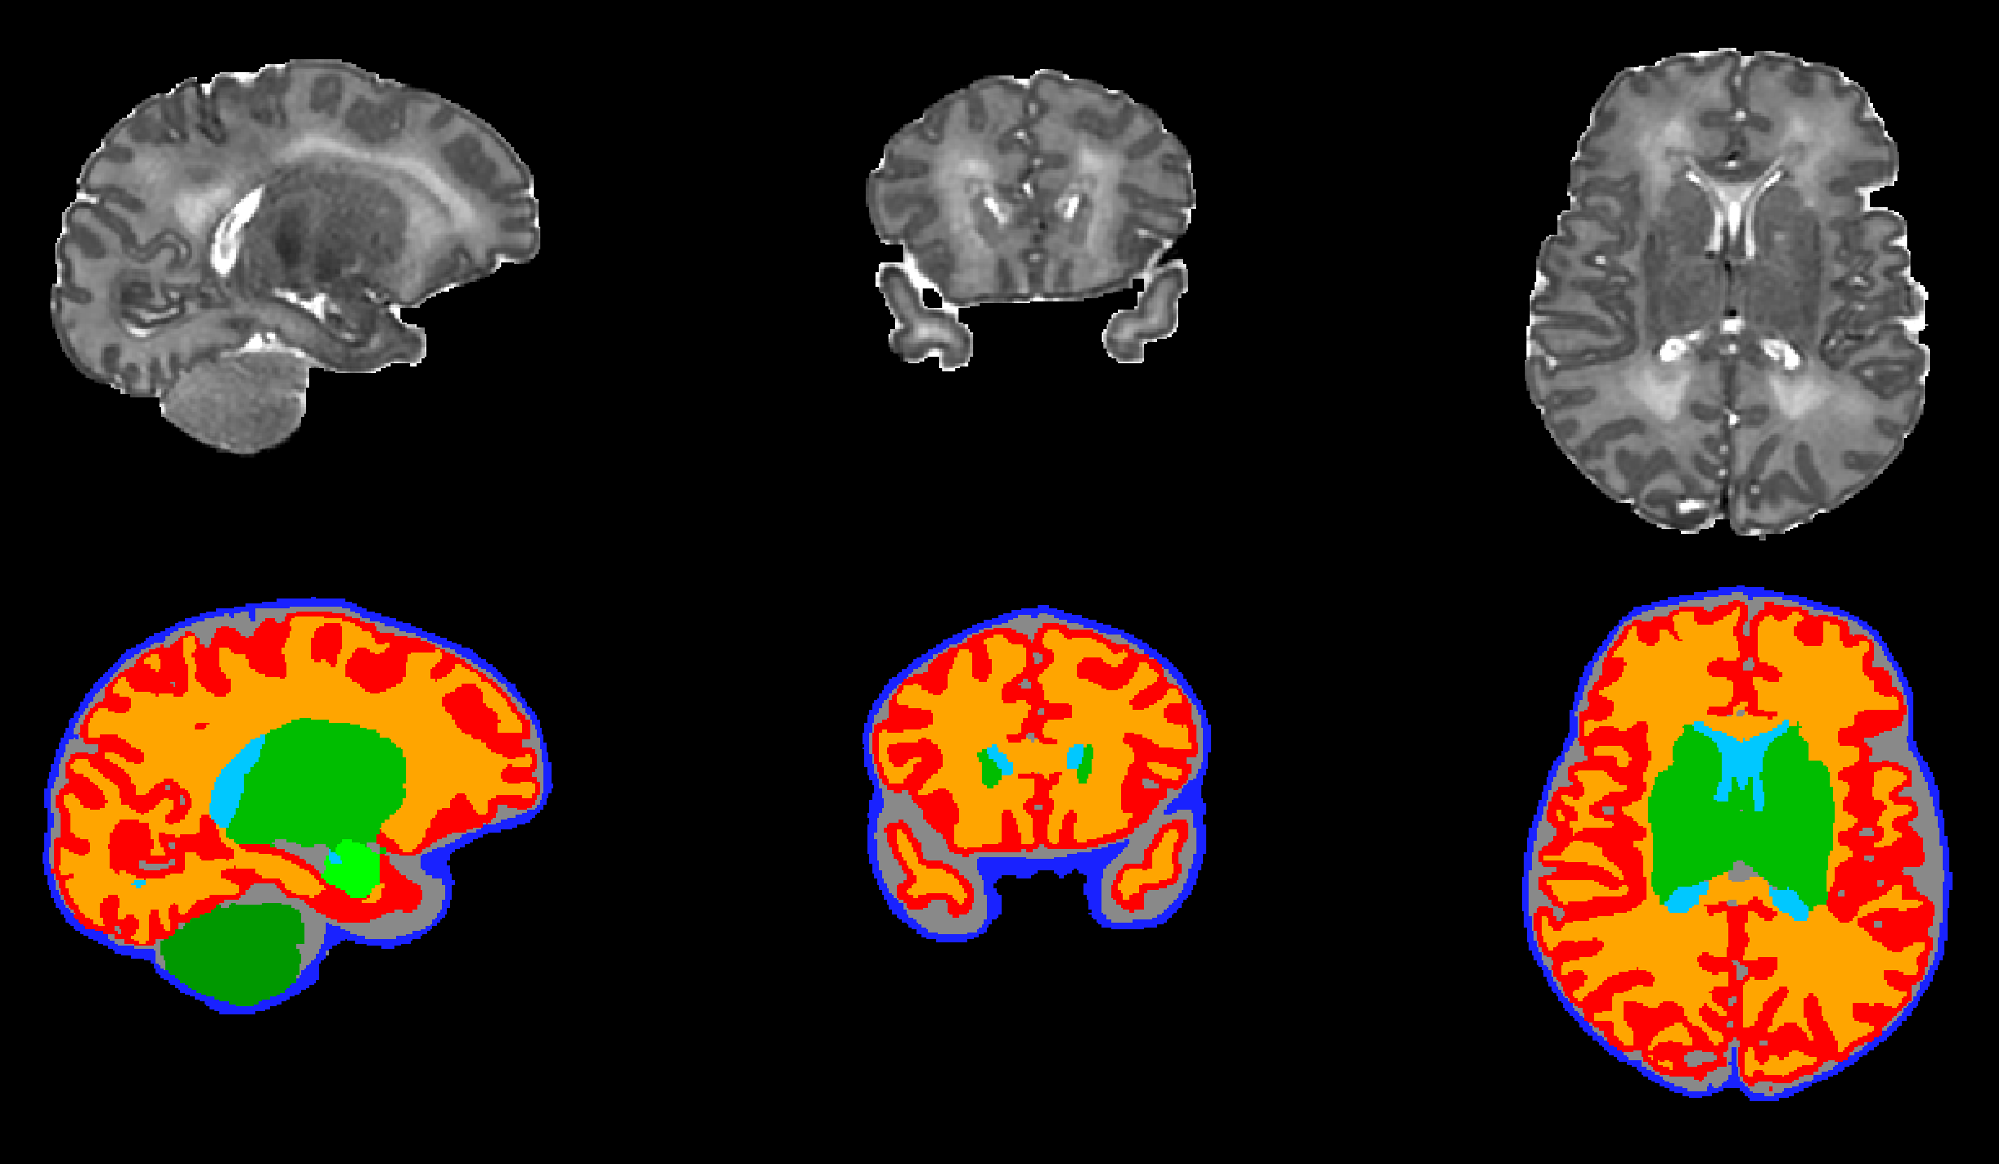

They can be viewed individually using 3D image viewers such as `FSLeyes`
(https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FSLeyes) or the `Human Connectome Projects image viewer (wb_view)`(https://www.humanconnectome.org/software/connectome-workbench). 

In [ ]:
#
# Get the data from github
# 
# NB: data is split into 3 sets to be under 25M per set
#
!wget -nv https://github.com/IS-pillar-3/datasets/raw/main/dHCP_brain_data_part_1.zip
!wget -nv https://github.com/IS-pillar-3/datasets/raw/main/dHCP_brain_data_part_2.zip
!wget -nv https://github.com/IS-pillar-3/datasets/raw/main/dHCP_brain_data_part_3.zip
#
from zipfile import ZipFile 
#
with ZipFile("dHCP_brain_data_part_1.zip", "r") as zObject:
  zObject.extractall(path=".")  
#
with ZipFile("dHCP_brain_data_part_2.zip", "r") as zObject:
  zObject.extractall(path=".")  
#
with ZipFile("dHCP_brain_data_part_3.zip", "r") as zObject:
  zObject.extractall(path=".")  
#
# NB: Stuff zipped from a Mac has an annoying additional directory
#
!rm -rf __MACOSX
#
# Data is in 3 parts to meet 25M github constraints
#
!rm -rf dHCP_brain_data_part_1.zip
!rm -rf dHCP_brain_data_part_2.zip
!rm -rf dHCP_brain_data_part_3.zip
#
# 
#
!mkdir -p dHCP_brain_data
!mv ./dHCP_brain_data_part_1/*.* ./dHCP_brain_data
!mv ./dHCP_brain_data_part_2/*.* ./dHCP_brain_data
!mv ./dHCP_brain_data_part_3/*.* ./dHCP_brain_data
#
!rm -rf dHCP_brain_data_part_1
!rm -rf dHCP_brain_data_part_2
!rm -rf dHCP_brain_data_part_3

### Task 3.1 Create a data loader for brain images and their segmentations

In the first task we will create a dataloader to load brain images and their segmentations.

First we need a module that will load medical image volumes (here `NiFti` images: `.nii.gz`). There are several options including `SimpleITK`. Here, we use the `nibabel` package

In [ ]:
# nibabel is a python module for reading different types of medical image format
import nibabel 

# os is a python standard module which allows manipulation of file paths (here combining directory paths with file paths)
import os 

# we define the directory of the data
directory = "./dHCP_brain_data"

# see here use of os.path.join to create the final path
image_file        = nibabel.load(os.path.join(directory,'sub-CC00050XX01_ses-7201_T2w_restore_brain.nii.gz')) 
segmentation_file = nibabel.load(os.path.join(directory,'sub-CC00050XX01_ses-7201_drawem_tissue_labels.nii.gz'))

img = image_file.get_fdata().astype(float)
seg = segmentation_file.get_fdata().astype(np.int32)

print(img.shape,seg.shape)
print(type(img),type(seg))

As we can see, loading data in this way returns a numpy array. Thus converting to a torch tensor is straightforward as

In [ ]:
#
# NB: Using variables img_tensor_a, img_tensor_b and img_tensor to make cells more easily re-runnable
#
img_tensor_a = torch.from_numpy(img).to(torch.float)
seg_tensor   = torch.from_numpy(seg).to(torch.float)
#
print(img_tensor_a.shape)

Using `imshow` to view one central slice of the image and it's segmentation

In [ ]:
import matplotlib.pyplot as plt
#
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
#                       
ax[0].imshow(img_tensor_a[:,:,120], cmap=plt.cm.gray)
ax[0].set_title('T2 image - axial slice')
ax[1].imshow(seg_tensor[:,:,120], cmap=plt.cm.Dark2)
ax[1].set_title('Tissue segmentation')
#

However, as we are dealing with 3D volumes we need to reshape our images into the form in which they will expected by Pytorch in order to perform convolutions, which is: 

$C\times D \times H \times W$

where $C$ = channels (otherwise known as features, here 1 since we only have one structural image per example), $D$ = depth, $H$ = height and $W$ = width (https://pytorch.org/docs/master/nn.html#torch.nn.Conv3d). 

Hence we need to re-order the spatial dimensions of our tensor using Pytorch `permute` and `unsqueeze`

In [ ]:
img_tensor_b = img_tensor_a.permute(2, 0, 1)
print(img_tensor_b.shape)
#
img_tensor = img_tensor_b.unsqueeze(0)
print(img_tensor.shape)

We use the dataframe in `dHCP_demographics.pkl` to obtain the image and segmentation data files pertaining to an observation, given an index number:

In [ ]:
import pandas as pd

meta_path = os.path.join(directory,'dHCP_demographics.pkl')
meta      = pd.read_pickle(meta_path)
print(meta)

Each image file can thus be defined through:

In [ ]:
meta_sample = meta.iloc[0]
img_path    = os.path.join(directory,'sub-' + str(meta_sample['id']) +'_ses-' + str(meta_sample['session']) +'_T2w_restore_brain.nii.gz')
img_sample  = nibabel.load(img_path)
#
print(img_path)

Now use the following steps to create your own data loader, from the skeleton code provided in the next cell. The data loader must handle the brain imaging data and clinical segmentation data for each index number:

1. Complete the class constructor - used to initialise class variables: folder (path to data folder), meta (the dataframe) and transform
2. Complete the overloaded `__len(self)__` class to return the number of data examples in `__getitem__`
3. Return the paths to the image and the segmentation file
4. Load the images
5. Convert the image data to tensors, and reshape them to the expected dimensions $C\times D \times H \times W $ (as described above)

**Hint** consider also looking at https://pytorch.org/tutorials/beginner/data_loading_tutorial.html for guidance

In [ ]:
#
# Students - create your own Dataset class. Replace the None's with your own code
#
# We create a class that inherits the torch Dataset abstract class 
#
class BrainSegmentationDataset(torch.utils.data.Dataset): 
    
    # initialise the class based on the folder containing the data and the project dataframe
    #
    def __init__(self, folder='', meta='', transform=None): 
        
        # STUDENTS CODE - replace Nones with correct code #
        # 2.1.1 initialise the paths to the data folder, the data frame and define the transform operations
        #
        self.folder    = None
        self.meta      = None
        self.transform = transform
        
    
    def __len__(self):
        
        # STUDENTS CODE - replace Nones with correct code #
        # 2.1.2 return the number of examples in the dataset
        #
        return None
    
    def __getitem__(self, idx):
        
        # STUDENTS CODE - replace Nones with correct code  
        # 2.1.3 return the paths to the image and the segmentation file 
        #
        meta_sample = self.meta.iloc[idx] # this will return the idx-th row from the dataframe
        image_name  = None  # use this to sample idx'th image (create image path using meta_sample)  
        label_name  = None # do the same for the idx'th segmentation  # THEY SHOULD MATCH
        
        # 2.1.4 load images 
        #
        image = None
        label = None
        
        # 2.1.5 Convert to tensors
        #
        img_tensor = None
        seg_tensor = None
        
        # 2.1.5 reshape to expected dimensions using permute and unsqueeze 
        # (you can do this in one or two steps per tensor)
        #
        img_tensor = None
        seg_tensor = None
        
        # convert to  tuple and return
        #
        sample = img_tensor, seg_tensor

        if self.transform:
            sample = self.transform(sample)
            
        return sample

### Task 3.2 Try out your Dataset class ###

**To Do** 

1. Instantiate (create) an instance of your data set by calling the `BrainSegmentationDataset` class constructor
2. Check that the length is correct
3. Obtain index 0 from `getitem()`, 
4. Plot the 120th axial slice of the returned image and segmentation. Be sure your segmentation matches your image
**Hint** remember that we have permuted the order of our slices and added a dimension for channels

5. Create a class iterator using `DataLoader` and create a batch of size 3, print the shape of the output

In [ ]:
#
# Students - try out your Dataset class. Replace the None's with your own code
#
 
# Create an instance of the BrainSegmentationDataset class by calling the constructor
ds = None # then we create the dataset 

# Check that the length is correct
None

# Obtain index 0 from getitem()
example_im,ex_label = None
print(type(example_im),example_im.shape,ex_label.shape)

# Plot the 120th axial slice by changing Nones for correct slice of image
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
#                      
ax[0].imshow(None, cmap=plt.cm.gray)
ax[0].set_title('T2 image - axial slice')
ax[1].imshow(None, cmap=plt.cm.Dark2)
ax[1].set_title('Tissue segmentation')

# Create a class iterator using DataLoader and create a batch of size 3
loaded_data = None

# Get a batch
im_batch, lab_batch = next(iter(loaded_data))
#
print('batch shape', im_batch.shape) 

# 6. Implementing Neural Networks with Pytorch 

We are now in a position to start building simple networks. To do this in Pytorch we must always define a specific class to represent our network. We can do this in two steps, by inheriting from `nn.Module`. Let's start by importing all the modules we will need:



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F #contains some useful functions like activation functions & convolution operations you can use
#

## 6.1 GPU or CPU?

Before we can even begin, we need to know whether we are using a GPU or a CPU. If its the former, the model and all the data should be uploaded into the GPU. Fortunately, we can define a variable "device" that will either be cpu or gpu depending on availability, and load the data automatically on the correct 'device'.

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print(device) 

We see that if cuda is available our model will be run on a GPU, otherwise the model will need to run on CPU.

## 6.2 Defining a network class.

A PyTorch network class is defined from a minimum of two functions:

1. The first part is creation of the constructor `__init__` in which you must define all parameters and layers that you will use. **Note**, you must always define the `super()` function to initialize and start the parent class
2. The second part is to define the forward pass through the function `forward(self,x)` which puts these layers together to calculates the output.

For example, here is the most simple network possible - a linear regression model - it has a single `nn.Linear` layer, which takes an input of size [1] and outputs also size [1].

In [ ]:
#
# Define network class "Model"
#
class Model(nn.Module):
   def __init__(self):
       super(Model, self).__init__()
       self.layer = torch.nn.Linear(1, 1)

   def forward(self, x):
       x = self.layer(x)      
       return x
#

While we explicitly define our forward pass, backpropagation is automatically defined by autograd so this does not need to be explicitly coded

Once complete, you can then create an instance of the class using `net = Model()`.

In [ ]:
#
# Create an instance of Model
#
net = Model()
#
print(net)

## 6.3 Training

Now we have defined and initialised our network, we must perform training to optimise the parameters (or `weights`) of the network. For this we must choose a loss function and optimiser:

### 6.3.1 Loss Function

The loss function is used to measure how well the prediction model will be able to make predictions. PyTorch includes many standard loss functions in the `torch.nn module`. For example, you can use the Cross-Entropy Loss to solve a multi-class classification problem, or a mean squared error (MSE) loss for regression. 

For example, to define the loss function and compute the losses:

```python
# First define the loss function e.g multiclass cross entropy loss 
loss_CE = nn.CrossEntropyLoss()
#
# Mean square error loss
loss_MSE = nn.MSELoss()

# Then call the loss function during training 
loss = loss_CE(prediction, target)
```

### 6.3.2 Optimizer

There are many optimizers available in PyTorch - see https://pytorch.org/docs/stable/optim.html for a full list and further examples. We will discuss loss functions and optimisers in more detail later in the module

You define an optmizer in the following way:

```python
# The Stochastic gradient descent optimiser (with momentum set to true)
optim = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
```

### 6.3.3. Forward pass

When performing a forward pass you never explicitly call the `forward` function, rather the inherited torch.nn.Module handles this behind the scenes. For more details see: https://discuss.pytorch.org/t/predict-output-by-model-does-not-need-call-forward/1489

Thus the entire forward pass reduces to two lines:

```python
# make prediction with forward pass
prediction = net(inputs) 

# Compute loss by calling the loss function 
 loss = loss_func(prediction, outputs) 

```

### 6.3.4 Backprop and clearing gradients

To perform backpropagation, you call `loss.backward()`, followed by `optim.step()`

**You must clear gradients before every training iteration to ensure there's no gradients remaining**

This is to avoid mixing up gradients between mini-batches. More specifically however, it is an side effect of the fact that PyTorch implements dynamic computation graphs as opposed to static ones (like tensorflow).

The fact that the `backward()` function in Pytorch accumulates gradients is useful for Recurrent Neural Networks and other more complex networks.

```python
net.zero_grad()   # Clears the existing gradient - this should be done prior to a training pass
optim.zero_grad() # Clears the gradient stored in the optimizer - this is equivalent to net.zero_grad(). 
loss.backward()   # Performs backpropragation - accumulates the gradient (by addition) for each parameter
optim.step()      # Performs a parameter update based on the current gradient, which is stored in
                  # the .grad attribute of a parameter, and the update rule. 
```

## 6.4 Example - training a linear regression model

### 6.4.1 First simulate some data 

We can create simulated data to test our simple regression network. The aim is to use our neural network to estimate / make predictions. 

We use the following function to randomly generate 100 data points:

$Y = \cos(x) \times x^3 + 4x + 0.6 \times rand()$


In [ ]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.random.rand(100)
y = np.cos(x) * np.power(x,3) + 4*x + np.random.rand(100)*0.6

plt.scatter(x, y)
plt.show()


Since we're using PyTorch, we need to convert our numpy array to a PyTorch tensor. The size of the input will be [100, 1], where 100 is the batch size, and 1 is the size of the input (as previously defined in our neural network).

In [ ]:
# convert numpy array to tensor in shape of input size
x = torch.from_numpy(x.reshape(-1, 1)).float()
y = torch.from_numpy(y.reshape(-1, 1)).float()
#
print(x.size(), y.size())

Now, given the network class we defined above, to train it we must go through the following steps (for any network we train we will follow the same broad structure):

### 6.4.2 Define the optimizer and loss function

We first define our optimizer and loss function. Here, we will use stochastic gradient descent (with momentum) as the optimizer. Since we are performing regression, the loss function we chose is Mean Squared Error, or `L2` loss. Another common loss function for regression is the Mean Absolute Error, or `L1` loss.


In [ ]:
# Define Optimizer and Loss Function
#
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
# 
loss_func = torch.nn.MSELoss()

### 6.4.3 Implement a training loop

Then we construct a training loop with the following steps: 

1. Clear the gradients
2. Pass data through the network (forward pass)
3. Compute the loss
4. Compute the backward pass 
5. Update the network parameters

During training we iterate through our data. Here we use number of epochs = 200, but the optimal number largely depends on the dataset and the task.

See how these 5 steps are called for a basic network below

In [ ]:
inputs  = x 
outputs = y 
epochs  = 200
#
for i in range(epochs):
    
    # 1. Clear gradients - here we could interchangibly use net.zero_grad()
    optimizer.zero_grad() 
    
    # 2. Pass data through network - note how you never explicitely call the forward pass
    prediction = net(inputs) 
    
    # 3. Compute loss by calling the loss function defined above
    loss = loss_func(prediction, outputs) 
    
    # 4. Accumulate gradients by calling the backwards pass 
    loss.backward() 
    
    # 5. update network parameters
    optimizer.step() 

    # Display results
    if i % 10 == 0:
        # note how we need to tranform data back to numpy
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)



Carefully read through the above code and check that you understand what all the steps are doing. You are going to need to replicate this basic structure going forward.

### 6.4.4 Results

We have now set up and performed simple regression with a neural network. You can see the results above, how in every iteration the red line (the prediction) updates, and moves closer to fit the data.

**You can perform regression with any neural network- the important step to remember is that your final layer should be of output size [1], and the loss function you use is suitable for regression - e.g. mean squared error, absolute squared error**

### 6.4.5 Suggested tasks

1. Change the loss function to Mean Absolute Error (L1 loss) - which loss function work better?
2. Change the optimiser?

### STUDENTS TASK - EXERCISE 4 -  MNIST image classification using a fully connected (MLP) network  ###

Now we have demonstrated the common structure of PyTorch networks and training loops we ask you to complete generation of a fully connected (MLP) network class for classification of MNIST images into 10 classes (one for each digit).

We suggest the network consists of 2 fully connected hidden layers and an output layer with 10 neurons with softmax activation (to estimate the probabilkties of each class). 

As discussed in the video lectures, each hidden layer corresponds to a linear transform (coded as a `nn.linear` layer) followed by a non-linear activation function. We will use ReLU activations for hidden layers; **each hidden layer should have 50 neurons**. 

### Task 4.1 Create the Dataloaders ###

Run this code to regenerate the MNIST train and test dataloaders with batch size 128

In [ ]:
#
# Create the Dataloaders
#
from torchvision import datasets, models, transforms

mnist_train_dataset = datasets.MNIST(root = 'mnist_data/train', download= True, train = True, transform = transforms.ToTensor())
mnist_test_dataset  = datasets.MNIST(root = 'mnist_data/test', download= True, train = False, transform = transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(
       mnist_train_dataset, batch_size=128, shuffle=True)

test_loader = torch.utils.data.DataLoader(
       mnist_test_dataset, batch_size=128, shuffle=True)

### Task 4.2 Sketch the design of your network ###

Remember, the definition of `fully connected` networks is that there is a connection between every single neuron in adjacent layers. If we consider our input data as the input layer, then each feature in the input must connect to each neuron in the first hidden layer. 

To make this work for images we must first stretch each $28 \times 28$ MNIST image into a single vector. This gives us $28 \times 28$ input features

 - If our hidden layers each have 50 neurons, what should be the sizes of their weights matrices?
 - MNIST has 10 classes, thus how many neurons do we need in our output layer, and what will be the dimensions of its weight matrix?

### Task 4.3 Complete the `__init__` constructor of a MNIST_MLP class ###

1. Use `super` to access functions from the super class
2. Use `nn.linear(in_features, out_features)` ( see https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) to define the first hidden layer. Remember `in_features` will be the number of input neurons (features of the input data) and `out_features` is the number of neurons in the hidden layer. Here, we have created the linear layer for you, you just need to replace in_features and out_features with the exact dimensions of the layer
3. Then create a second `nn.linear`  hidden layer. Given your network design how many input and output neurons should it have?
4. Use `nn.linear` to define the output layer. Given your network design how many input and output neurons should it have?

We have defined the forward function for you, in the code below. This determines how the layers (defined in `__init__`) are pieced together. You can see how, line by line, the output of each layer is fed in as the input to the next. Here RelU's are applied in the forward function as they learn no parameters (`weights`)

In [ ]:
class MNIST_MLP(nn.Module):
    
    #
    # Students - Replace the None's with your own code
    #
    
    def __init__(self):
        
        # Call super to access functions from the inherited class
        None
        
        # Define the first hidden layer using nn.linear(in_feataures,out_features)
        # You need to replace `in_features` with the number of pixels in each image (total number of features)
        # You need to replace `out_features` with number of hidden neurons in the first layer (defined above)
        self.fc1 = nn.Linear(None, None) 

        # Now repeat the process second hidden layer
        self.fc2 = None
        
        # Repeat the process for the output layer - how many output neurons will you need for this 
        # multi-class problem?
        self.fc3 = None
        
        # Define the output activation as softmax
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x): 
        
        # Flattens the MNIST images to a 28 x 28 feature vector 
        # where 28 is the height and width dimensions of each image)
        x = x.view(-1, 28*28) 

        # layer one combines the first linear activation layer self.fc1 with a relu activation
        # as relu has no parameters it is common to define it in the forward function (instead of init) using the functional form F.relu
        x = F.relu(self.fc1(x))
        
        # layer two combined the second linear activation layer with a second ReLU
        x = F.relu(self.fc2(x))
        
        # we then call the output layer
        x = self.fc3(x)  
        
        # and pass it through a softmax to turn the pr4edictions into class probabilities
        x = self.softmax(x)
        return x

# After we have defined our model we load it onto our device
model = MNIST_MLP().to(device) 
#

### Task 4.4 Define Optimizers and Loss functions ###

Now initialise your choice of optimizer and loss function. For optimizer we suggest the SGD optimizer with momentum and learning rate 0.01 (defined above). 

**What is an appropriate loss function for multi-class classification?**

In [ ]:
#
# Students - Replace the None's with your own code
#
optimizer     = None
loss_function = None

### Task 4.5 Train and Validate ###

Now we define a train and a test function, which should look rather similar.

They do the following, in order:

- Get a batch of data
- Zero all gradients (**train only**)
- Pass the data through the network
- Evaluate the loss and record it (if necessary)
- Backpropagate the loss and update the parameters (**train only**)

**Check you know what each line in these functions is doing. What is the difference between `train()` and `validate()`?**



In [ ]:
def train(epoch, log_interval=200):
    
    # Set model to training mode
    model.train()
    
    # Loop over each batch from the training set
    # enumerate is an iterator similar to iter() 
    #except that it also gives the batch number 
    for batch_number, (images, labels) in enumerate(train_loader):
        
        # Copy data to GPU if needed
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero all the gradients before each batch
        optimizer.zero_grad() 
        
        # Pass the data through the network
        output = model(images)

        # Calculate loss
        loss = loss_function(output, labels)

        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        if batch_number % log_interval == 0: 
            
            # print the loss every 'log_interval' batch
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, 
                   batch_number * len(images), len(train_loader.dataset),
                   100.0 * batch_number / len(train_loader), loss.data.item()))
        #
    #
#

In [ ]:
def validate(loss_vector, accuracy_vector):
    
    # Set the model to evaluate mode. 
    model.eval()
    
    val_loss, correct = 0, 0
    for images, labels in test_loader:
        
        # Copy the data to the GPU (if you are using one)
        images = images.to(device)
        labels = labels.to(device)
        
        
        # Pass the images to the model
        output = model(images)
        
        # Here we are intersted in the total loss
        val_loss += loss_function(output, labels).data.item()  
        
        # Get the index of the max log-probability
        pred = output.data.max(1)[1] 
        
        # We sum the cases where the prediction and the label match
        # We need this data to be in the cpu to calculate   
        correct += pred.eq(labels.data).cpu().sum()
                                                   
    # Now we divide the sum val loss by the total number of validation images
    # to give an average validation loss
    val_loss /= len(test_loader) 
                                      
    # We store this for possible graphing later
    loss_vector.append(val_loss) 

    
    accuracy = 100.0 * correct.to(torch.float32) / len(test_loader.dataset)  
    
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(test_loader.dataset), accuracy))
#

### Train / eval mode ###

Note that it is essential that the model be set to train / eval mode depending on whether it's training or validating. If in eval mode, the gradients will not be calculated, backpropagation will not take place and functions such as dropout will operate in evaluate mode

### Task 4.6 Run the training loop ###

We have set the network to run for 7 epochs, but feel free to experiment with this. What happens if you change the number of neurons in the network class?

**Note** consider swapping between CPU and GPU hardware to compare runtimes. For a simple problem such as this however, CPU is fine

In [ ]:
epochs = 7

lossv, accv = [], []
#
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
#

Finally, we can plot our validation loss and accuracy in a graph to see our progress:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5, 3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

Done! We've trained an MLP! Is this a good network? For reference, a test accuracy of below ~97% on MNIST is considered poor.

### STUDENTS TASK - EXERCISE 5 -  Suggested additional exercise  ###

1. See if you can code up and train a PyTorch version of the MLP you designed in the Theory session
2. Try optimising the performance by changing the numbers of hidden neurons and layers

## References

For more reading on this topic see the official PyTorch tutorials https://pytorch.org/tutorials